In [23]:
import xarray as xr
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

In [3]:
test = xr.open_dataset("/Users/nyelab/Downloads/ucur.1981.nc")

In [4]:
test


<xarray.Dataset>
Dimensions:   (lat: 418, level: 40, lon: 360, time: 12)
Coordinates:
  * level     (level) float32 5.0 15.0 25.0 ... 3.483e+03 3.972e+03 4.478e+03
  * lon       (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 357.0 358.0 359.0 360.0
  * lat       (lat) float32 -74.0 -73.67 -73.33 -73.0 ... 64.0 64.33 64.67 65.0
  * time      (time) datetime64[ns] 1981-01-01 1981-02-01 ... 1981-12-01
Data variables:
    date      (time) int32 ...
    timePlot  (time) float32 ...
    ucur      (time, level, lat, lon) float32 ...
Attributes: (12/13)
    creation_date:    Sat Dec 16 20:00:00 MDT 2006
    sfcHeatFlux:      \nNote that the net surface heat flux are the total sur...
    time_comment:     The internal time stamp indicates the FIRST day of the ...
    Conventions:      COARDS
    grib_file:        godas.M.198101-12.grb
    html_REFERENCES:  http://www.cpc.ncep.noaa.gov/products/GODAS/background....
    ...               ...
    html_GODAS:       www.cpc.ncep.noaa.gov/products/GODAS
    comment:          NOTE:  THESE ARE THE BIAS CORRECTED GODAS FILES.
    title:            GODAS: Global Ocean Data Assimilation System
    References:       https://www.psl.noaa.gov/data/gridded/data.godas.html
    dataset_title:    NCEP Global Ocean Data Assimilation System (GODAS)
    history:          Created 2006/12 by Hoop\nConverted to chunked, deflated...

In [19]:
test.ucur

<xarray.DataArray 'ucur' (time: 12, level: 40, lat: 418, lon: 360)>
[72230400 values with dtype=float32]
Coordinates:
  * level    (level) float32 5.0 15.0 25.0 ... 3.483e+03 3.972e+03 4.478e+03
  * lon      (lon) float32 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * lat      (lat) float32 -74.0 -73.67 -73.33 -73.0 ... 64.0 64.33 64.67 65.0
  * time     (time) datetime64[ns] 1981-01-01 1981-02-01 ... 1981-12-01
Attributes: (12/15)
    dataset:                  NCEP GODAS
    var_desc:                 u of current
    level_desc:               Multiple Levels
    statistic:                Monthly Mean
    parent_stat:              Individual Obs
    sub_center:               Environmental Modeling Center
    ...                       ...
    level_indicator:          160
    gds_grid_type:            0
    parameter_table_version:  2
    parameter_number:         49
    actual_range:             [-1.1770375  1.3724779]
    valid_range:              [-2.  2.]

In [5]:
test2 = xr.open_dataset("/Users/nyelab/Downloads/vcur.1981.nc")

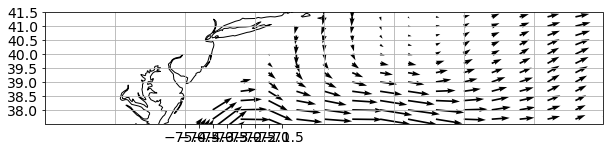

In [33]:
fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'projection': ccrs.PlateCarree()})
extent = [280,300,37.5,41.5]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines(resolution='50m')
C=plt.quiver(test.lon[280:300], test.lat[330:350], test.ucur[0,0,330:350,280:300],test2.vcur[0,0,330:350,280:300])
ax.set_xticks(np.arange(-75,-71,0.5), crs=ccrs.PlateCarree())
ax.set_yticks(np.arange(38,42,0.5), crs=ccrs.PlateCarree())
ax.tick_params(labelsize=14)